In [245]:
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [246]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import os, shutil

# Importing dataset and cleaning data

In [247]:
folder = '../Proyecto/'

In [248]:
dataset = pd.ExcelFile(folder+"Analytics_Tickets_FINAL.xlsx")

In [249]:
print(dataset.sheet_names)

['pivot', 'category', 'ticket details', 'Sheet1', 'Categories Gus']


In [250]:
# Load a sheet into a DataFrame by name: tickets
tickets = dataset.parse('ticket details')

In [251]:
tickets = tickets.drop(['Impacted application', 'Configuration Item', 'Task type', 'Status', 'Caused by a Change', 'Duration', 'Requester','Reassignment count', 'Priority', 'Assignment Group', 'Assigned to', 'Resolved on','Created', 'Created on', 'Closed on', 'Impacted CI Portfolio', 'Opened by', 'Resolved', 'Service offering', 'Diff', 'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29', 'Unnamed: 30'],axis=1)
tickets.columns

Index(['Number', 'Additional comments', 'Short Description',
       'Comments and Work notes'],
      dtype='object')

In [252]:
def trimAllColumns(df):
    """
    Trim whitespace from ends of each value across all series in dataframe
    """
    trimStrings = lambda x: x.strip() if type(x) is str else x
    return df.applymap(trimStrings)

tickets = trimAllColumns(tickets)

In [253]:
#Renaming dataframe columns
tickets.columns = ['ticket_number','category','short_description','comments_and_work_notes']
tickets['category'] = tickets['category'].str.upper()
tickets.fillna('')

,ticket_number,category,short_description,comments_and_work_notes
0,INC2829218,HADOOP,Object: SiteScope:DEFRAVMPHPSIS01.eurw.ey.net:...,26-01-2015 04:20:26 - Sarath C R (Work notes)\...
1,INC3174332,HADOOP,"Object: /var, Node: [Undefined], Application: ...",28-05-2015 06:10:49 - Faustino Pasquino (Work ...
2,INC3180672,HADOOP,"Object: /var/log, Node: [Undefined], Applicati...",02-06-2015 11:54:25 - Mukul Choure (Work notes...
3,INC3199017,HADOOP,"Object: /var/log, Node: USSECRLQIDA007, Applic...",05-06-2015 14:35:25 - Yogeshprabhu Jagadeesan ...
4,INC3203293,HADOOP,"Object: /var/log, Node: ussecrldida004.eydev.n...",08-06-2015 14:17:18 - Diego Roman Farre (Work ...
5,INC3207898,HADOOP,"Object: /var/log, Node: USSECVLDIDA053.eydev.n...",10-06-2015 11:51:32 - Diego Roman Farre (Work ...
6,INC3221858,HADOOP,"Object: /var/log, Node: USSECVLDIDA053.eydev.n...",12-06-2015 03:07:05 - Laiju Babu (Work notes)\...
7,INC3268063,HADOOP,"Object: /var, Node: [Undefined], Application: ...",29-06-2015 14:06:38 - Diego Roman Farre (Work ...
8,INC3271861,HADOOP,"Object: /usr, Node: USSECVLDIDA053.eydev.net, ...",01-07-2015 13:30:30 - Diego Roman Farre (Work ...
9,INC3272347,HADOOP,"Object: /var/log, Node: derusrluida021.eyua.ne...",01-07-2015 11:07:39 - Diego Roman Farre (Work ...


In [254]:
tickets[tickets['category'].str.contains("HADOOP", case=False, na=False)].replace
#tickets[(tickets.ticket_number == 'INC4937307')]
#tickets.loc[tickets.category contains 'HADOOP', 'Category_new'] = 'HADOOP' 


<bound method NDFrame.replace of      ticket_number category  \
0       INC2829218   HADOOP   
1       INC3174332   HADOOP   
2       INC3180672   HADOOP   
3       INC3199017   HADOOP   
4       INC3203293   HADOOP   
5       INC3207898   HADOOP   
6       INC3221858   HADOOP   
7       INC3268063   HADOOP   
8       INC3271861   HADOOP   
9       INC3272347   HADOOP   
11      INC3275879   HADOOP   
12      INC3276410   HADOOP   
13      INC3278810   HADOOP   
14      INC3279291   HADOOP   
15      INC3283257   HADOOP   
16      INC3294186   HADOOP   
17      INC3294567   HADOOP   
18      INC3297466   HADOOP   
19      INC3315479   HADOOP   
20      INC3324142   HADOOP   
21      INC3325617   HADOOP   
22      INC3334523   HADOOP   
23      INC3337711   HADOOP   
24      INC3342350   HADOOP   
25      INC3345483   HADOOP   
26      INC3347978   HADOOP   
27      INC3392234   HADOOP   
28      INC3400962   HADOOP   
29      INC3402550   HADOOP   
30      INC3412153   HADOOP   
...   

In [255]:
#Determine pivot table
impute_grps = tickets.pivot_table(values=["ticket_number"], index=["category"], aggfunc=lambda x: len(x.unique()), fill_value=0,margins=True)
print(impute_grps.sort_values('ticket_number',ascending=False).head(200))

impute_grps = tickets.pivot_table(values=["ticket_number"], index=["category"], aggfunc=lambda x: 100*x.count()/tickets.shape[0], fill_value=0,margins=True)
print(impute_grps.sort_values('ticket_number',ascending=False).head(200))

#impute_grps
#impute_grps.to_csv("Categories.csv")

          ticket_number
category               
All                3415
HADOOP             2408
SPOTFIRE            561
TABLEAU             337
TALEND              110
          ticket_number
category               
All          100.000000
HADOOP        70.538574
SPOTFIRE      16.419214
TABLEAU        9.839884
TALEND         3.202329


In [256]:
tickets["description"] = tickets["short_description"] + tickets["comments_and_work_notes"] 
del tickets["short_description"]
del tickets["comments_and_work_notes"]

In [257]:
#Dummies variables generation
Categories = pd.get_dummies(tickets['category'])
tickets = tickets.join(Categories)
del tickets["category"]

In [258]:
tickets

,ticket_number,description,HADOOP,SPOTFIRE,TABLEAU,TALEND
0,INC2829218,Object: SiteScope:DEFRAVMPHPSIS01.eurw.ey.net:...,1,0,0,0
1,INC3174332,"Object: /var, Node: [Undefined], Application: ...",1,0,0,0
2,INC3180672,"Object: /var/log, Node: [Undefined], Applicati...",1,0,0,0
3,INC3199017,"Object: /var/log, Node: USSECRLQIDA007, Applic...",1,0,0,0
4,INC3203293,"Object: /var/log, Node: ussecrldida004.eydev.n...",1,0,0,0
5,INC3207898,"Object: /var/log, Node: USSECVLDIDA053.eydev.n...",1,0,0,0
6,INC3221858,"Object: /var/log, Node: USSECVLDIDA053.eydev.n...",1,0,0,0
7,INC3268063,"Object: /var, Node: [Undefined], Application: ...",1,0,0,0
8,INC3271861,"Object: /usr, Node: USSECVLDIDA053.eydev.net, ...",1,0,0,0
9,INC3272347,"Object: /var/log, Node: derusrluida021.eyua.ne...",1,0,0,0


# Dividing dataset in Train and Test

In [259]:
list_classes = ['HADOOP','SPOTFIRE', 'TALEND', 'TABLEAU']
y = tickets[list_classes].values

In [260]:
#dividing entire dataset in Train and test
x_train_all, x_test, y_train_all, y_test = train_test_split(tickets, y, test_size = 0.1)

#dividing training dataset in Train and Validation
x_train, x_valid, y_train, y_valid = train_test_split(x_train_all, y_train_all, test_size = 0.3)

In [261]:
raw_text_train = x_train["description"].str.lower()
raw_text_train = raw_text_train.values.astype('U')
raw_text_valid = x_valid["description"].str.lower()
raw_text_valid = raw_text_valid.values.astype('U')
raw_text_test = x_test["description"].str.lower()
raw_text_test = raw_text_test.values.astype('U')

# Creating features Matrix

In [262]:
from sklearn.feature_extraction.text import TfidfVectorizer

max_features = 100000000

tfidf_vectorizer = TfidfVectorizer(max_df=1, min_df=1,
                                   max_features=max_features,
                                   stop_words='english')

tfidf_matrix_train = tfidf_vectorizer.fit_transform(raw_text_train)

In [263]:
top_10 = np.argsort(tfidf_matrix_train.sum(axis=0))[0,::-1][0,:10].tolist()[0]

In [264]:
feature_names = np.array(tfidf_vectorizer.get_feature_names())
feature_names[np.array(top_10)]

array(['99123040', '58349dee', '2043e8fa', 'ea6776d6', 'a6f39200',
       '5fb20aa2', '3569a5c2', '8cacf002', '59b7fd14', 'helix_dev_job'],
      dtype='<U89')

In [265]:
dense_matrix_train = tfidf_matrix_train.todense()

In [266]:
dense_matrix_train.shape, y_train.shape

((2163, 14270), (2163, 4))

In [267]:
tfidf_matrix_valid = tfidf_vectorizer.transform(raw_text_valid)

In [268]:
dense_matrix_valid = tfidf_matrix_valid.todense()

# Creating NN Model

In [269]:
#Balancing classes through class_weights (sklearn)
from sklearn.utils import class_weight
fv_classes = np.vectorize(lambda x : list_classes[x])
y_train_cat = fv_classes(np.argmax(y_train,axis=1))


class_weights = class_weight.compute_class_weight('balanced', np.unique(y_train_cat), y_train_cat)
class_weights

array([0.35296997, 1.54059829, 2.53873239, 8.07089552])

In [270]:
#Importing models from models.py
from models import model_1
from models import model_2
from models import model_3
from models import model_4
from models import model_5

""""
All          100.000000
HADOOP        70.538574
SPOTFIRE      16.419214
TABLEAU        9.839884
TALEND         3.202329
"""

input_features = dense_matrix_train.shape[1]

#Using models defined on models.py
lr = 0.01
dropout_rate = 0.6
model = model_5(input_features,lr,dropout_rate, class_weights)

batch_size = 256
epochs = 300


INFO (theano.gof.compilelock): Refreshing lock C:\Users\Gustavo.Villegas\AppData\Local\Theano\compiledir_Windows-10-10.0.15063-SP0-Intel64_Family_6_Model_142_Stepping_9_GenuineIntel-3.6.4-64\lock_dir\lock


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_29 (Dense)             (None, 128)               1826688   
_________________________________________________________________
batch_normalization_17 (Batc (None, 128)               512       
_________________________________________________________________
dropout_53 (Dropout)         (None, 128)               0         
_________________________________________________________________
middle (Dense)               (None, 256)               33024     
_________________________________________________________________
batch_normalization_18 (Batc (None, 256)               1024      
_________________________________________________________________
dropout_54 (Dropout)         (None, 256)               0         
_________________________________________________________________
Salida (Dense)               (None, 4)                 1028      
__________

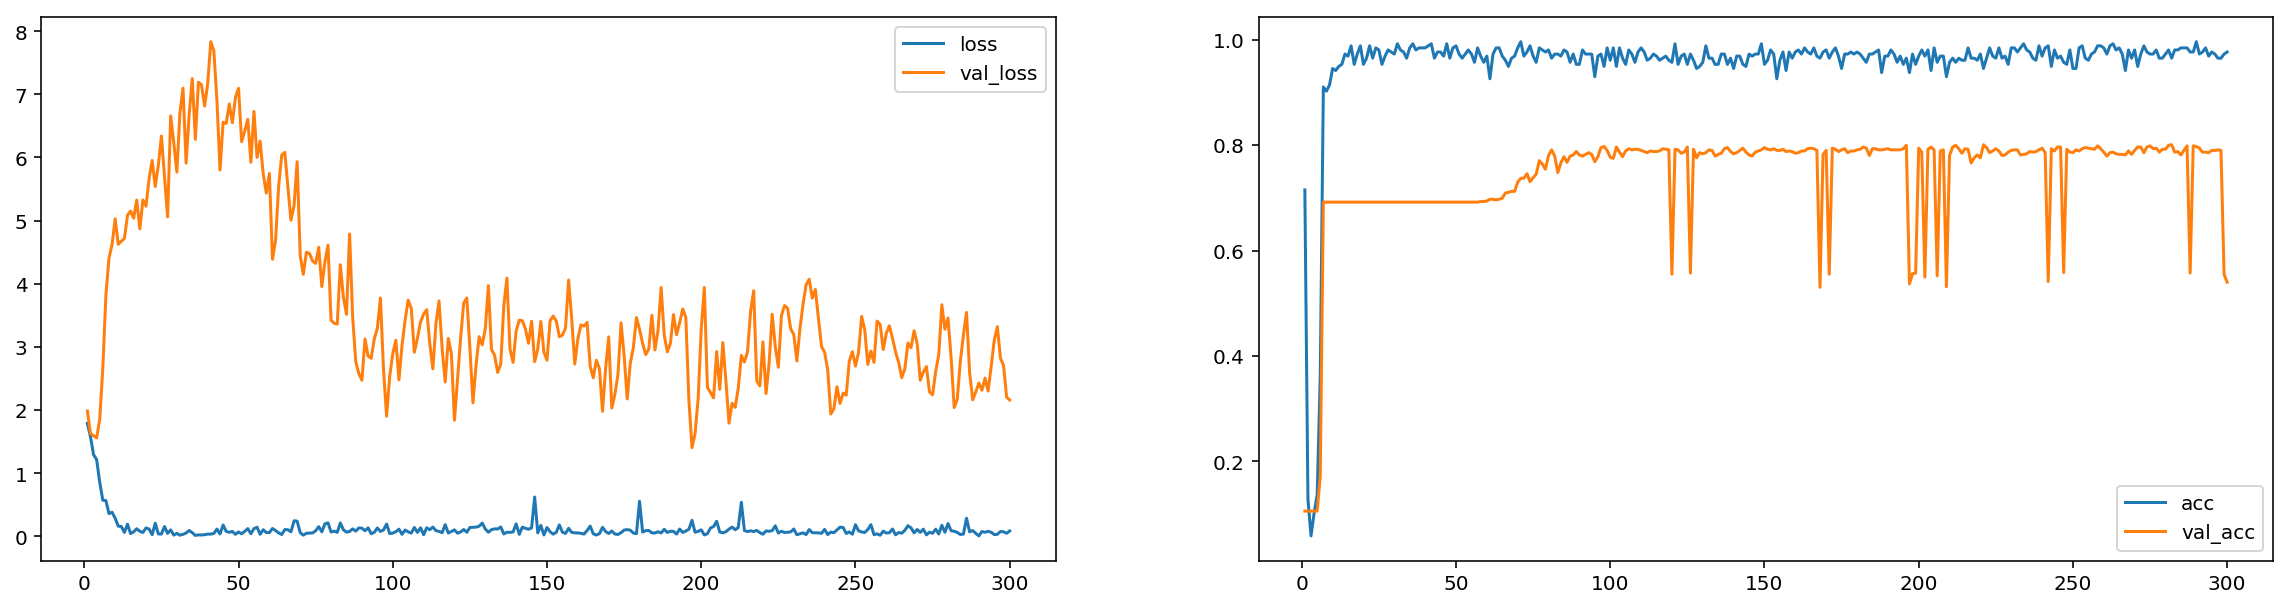


Epoch 00300: val_acc did not improve


In [271]:
from helper import PlotLosses
import keras.backend.tensorflow_backend as K
#from keras import backend as K
K.set_session


from keras.callbacks import ModelCheckpoint
checkpointer = ModelCheckpoint(filepath='9.hdf5',monitor='val_acc', verbose=1, save_best_only=True)
#checkpointer = ModelCheckpoint(filepath='8.hdf5',monitor='val_loss', verbose=1, save_best_only=True, mode='max')

plot_losses = PlotLosses(plot_interval=1, 
                         evaluate_interval=20, 
                         x_val=dense_matrix_valid, 
                         y_val_categorical=y_valid)
history = model.fit(dense_matrix_train, 
          y_train, 
          batch_size = batch_size,
          epochs=epochs, 
          verbose=1,
          validation_data=(dense_matrix_valid, y_valid), 
          callbacks=[plot_losses, checkpointer],
          class_weight=class_weights,
          shuffle=True
         )

# Evaluating Validation dataset

In [238]:
model.load_weights("./9.hdf5")

In [235]:
tfidf_matrix_valid.shape, y_valid.shape

((928, 14126), (928, 4))

In [239]:
pred_valid = model.predict(dense_matrix_valid, verbose = 1)
pred_train = model.predict(dense_matrix_train, verbose = 1)

2163/2163 [==============================] - 1s 303us/step


In [240]:
print("Train accuracy: " + str(model.evaluate(dense_matrix_train, y_train)))
print("Valid accuracy: " + str(model.evaluate(dense_matrix_valid, y_valid)))

2163/2163 [==============================] - 1s 257us/step
Train accuracy: [0.043564755100346984, 0.9939898289412853]
928/928 [==============================] - 0s 260us/step
Valid accuracy: [1.8176883623517792, 0.8189655172413793]


# Predict for test

In [241]:
tfidf_matrix_test = tfidf_vectorizer.transform(raw_text_test)

In [242]:
dense_matrix_test = tfidf_matrix_test.todense()

In [243]:
pred = model.predict(dense_matrix_test, verbose=1)

344/344 [==============================] - 0s 364us/step


In [244]:
#Accuracy on Test Dataset
print("Accuracy for Test: ")
model.evaluate(dense_matrix_test, y_test)


Accuracy for Test: 
344/344 [==============================] - 0s 283us/step


[1.956368586351705, 0.7790697674418605]

In [94]:
#Creating prediction labels array
fvl = np.vectorize(lambda x : list_classes[x])
test_pred = fvl(np.argmax(pred,axis=1))


In [95]:
#Exporting predictions results to excel file

#Deleting file from disk if it exists
file_path = './tickets_classification_test_pred_5.xlsx'
if os.path.isfile(file_path):
    os.unlink(file_path)

predictions_test = x_test

if "HADOOP" in predictions_test.columns:
    del predictions_test["HADOOP"], predictions_test["SPOTFIRE"], predictions_test["TABLEAU"], predictions_test["TALEND"]

predictions_test["Category"] = test_pred
predictions_test.to_excel("tickets_classification_test_pred_5.xlsx", index = False)


C:\Users\Gustavo.Villegas\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
